## 1.1 Оценки мат. ожидания, дисперсии,

### Задание 1

$f_{\xi}(x) = \theta^2 x e^{-\theta x}, \quad x \geq 0 $ -  это гамма-распределение  

Основное определение:

$f(x; k, θ) = x^{k-1} \cdot e^{-x/θ} \cdot \frac{1}{θ^k * Γ(k)}$ для x > 0

У нас параметры:   
$k = 2$ и $\theta = \frac{1}{\theta}$ ($Γ(2) = 1! = 1$)

#### (a) Аналитическое вычисление мат. ожидания, дисперсии, и мат. ожидания квадрата $\xi$:

$
\mathsf{E}[\xi] = \int\limits_{0}^{\infty} x \cdot \theta^2 x e^{-\theta x} dx = \frac{1}{\theta}\int\limits_{0}^{\infty} {(\theta x)}^2 e^{-\theta x} dx
$

$\int\limits_{0}^{\infty} t^n e^{-t} dt = n!$ - по св-ву Г-функции, $t = \theta x$

$
\mathsf{E}[\xi] = \frac{2!}{\theta}  = \frac{2}{\theta} 
$


$
\mathsf{E}[\xi^2] = \int\limits_{0}^{\infty} x \cdot \theta^2 x^2 e^{-\theta x} dx = \frac{1}{\theta^2}\int\limits_{0}^{\infty} {(\theta x)}^3 e^{-\theta x} dx
$

$\int\limits_{0}^{\infty} t^n e^{-t} dt = n!$ - по св-ву Г-функции, $t = \theta x$

$
\mathsf{E}[\xi^2] = \frac{3!}{\theta^2} = \frac{6}{\theta^2} 
$

$
\mathsf{D}[\xi] = \mathsf{E}[\xi^2] - (\mathsf{E}[\xi])^2 = \frac{6}{\theta^2}  - (\frac{2}{\theta} )^2 = \frac{2}{\theta^2} 
$

In [25]:
theta_values = [0.5, 2, 8]
analytical_results = {}

for theta in theta_values:
    E_x = 2 / theta
    E_x2 = 6 / (theta ** 2)
    D_x = 2 / (theta ** 2)
    analytical_results[theta] = {
        'mean' : E_x,
        'variance': D_x,
        'mean x^2': E_x2
    }
    print(f"theta: {theta} \n E_x: {E_x} D_x: {D_x} E_x^2: {E_x2}")

theta: 0.5 
 E_x: 4.0 D_x: 8.0 E_x^2: 24.0
theta: 2 
 E_x: 1.0 D_x: 0.5 E_x^2: 1.5
theta: 8 
 E_x: 0.25 D_x: 0.03125 E_x^2: 0.09375


#### (b) Оценки мат. ожидания, дисперсии, и мат. ожидания квадрата $\xi$ для нескольких выборок:

In [26]:
import numpy as np

np.random.seed(42)

def generate_sample(theta, size):
    return np.random.gamma(shape=2, scale=1/theta, size=size)  # scale - масштаб гамма-распределения

def estimates(sample):
    # Мат. ожидание
    mean_est = np.mean(sample)
    # Дисперсия
    var_est = np.var(sample, ddof=1)    # ddof - поправка Бесселя
    # Квадрат мат.ожидания
    sqr_mean_est = np.mean(sample ** 2)
    
    return mean_est, var_est, sqr_mean_est

k_values = [2**i for i in range(4, 16)]
results = {}
    
for theta in theta_values:
    results[theta] = {
        'k': [],
        'mean_est': [],
        'var_est': [],
        'sqr_mean_est': []
    }
    
    for k in k_values:
        # Генерация выборки
        sample = generate_sample(theta, k)
        
        # Вычисление оценок
        mean_est, var_est, sqr_mean_est = estimates(sample)
        
        # Сохранение результатов
        results[theta]['k'].append(k)
        results[theta]['mean_est'].append(mean_est)
        results[theta]['var_est'].append(var_est)
        results[theta]['sqr_mean_est'].append(sqr_mean_est)

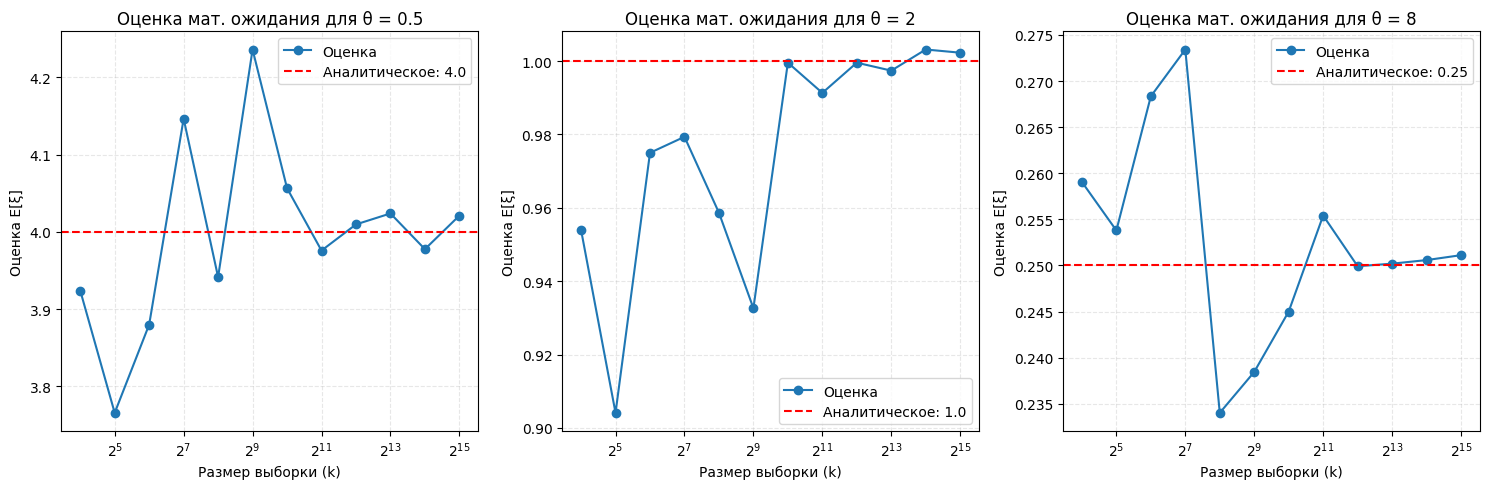

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, theta in enumerate(theta_values):
    ax = axes[i]
    
    k_vals = results[theta]['k']
    mean_est = results[theta]['mean_est']
    analytical_mean = analytical_results[theta]['mean']
    
    ax.plot(k_vals, mean_est, 'o-', label='Оценка')
    ax.axhline(y=analytical_mean, color='r', linestyle='--', label=f'Аналитическое: {analytical_mean}')
    
    ax.set_xscale('log', base=2)
    ax.set_xlabel('Размер выборки (k)')
    ax.set_ylabel('Оценка E[ξ]')
    ax.set_title(f'Оценка мат. ожидания для θ = {theta}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

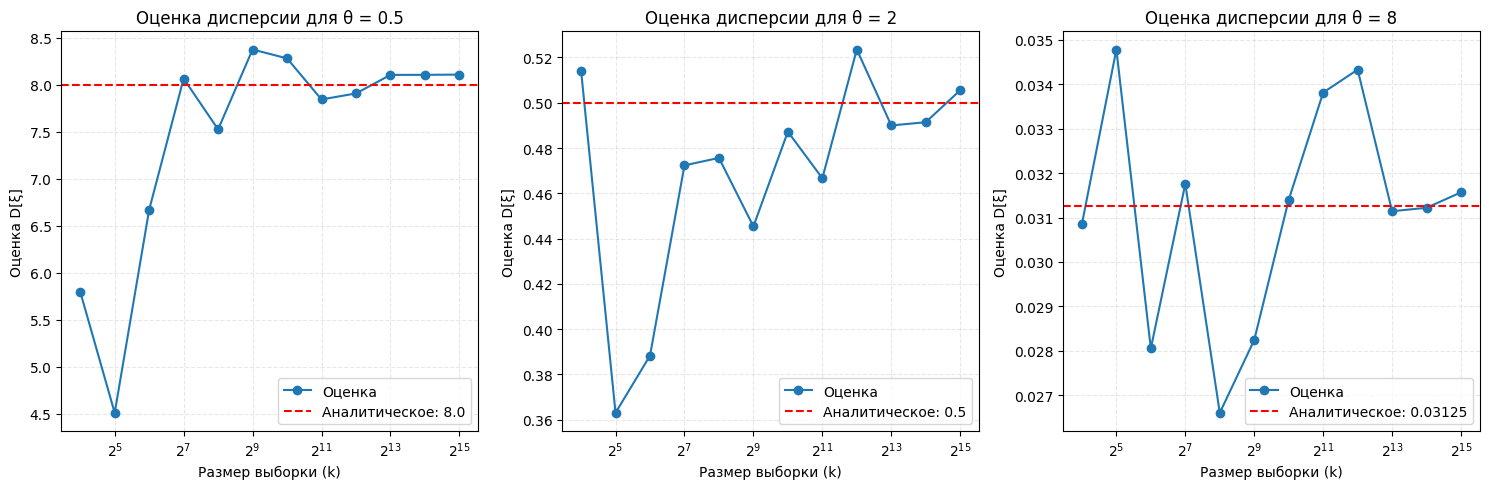

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, theta in enumerate(theta_values):
    ax = axes[i]
    
    k_vals = results[theta]['k']
    var_est = results[theta]['var_est']
    analytical_var = analytical_results[theta]['variance']
    
    ax.plot(k_vals, var_est, 'o-', label='Оценка')
    ax.axhline(y=analytical_var, color='r', linestyle='--', label=f'Аналитическое: {analytical_var}')
    
    ax.set_xscale('log', base=2)
    ax.set_xlabel('Размер выборки (k)')
    ax.set_ylabel('Оценка D[ξ]')
    ax.set_title(f'Оценка дисперсии для θ = {theta}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

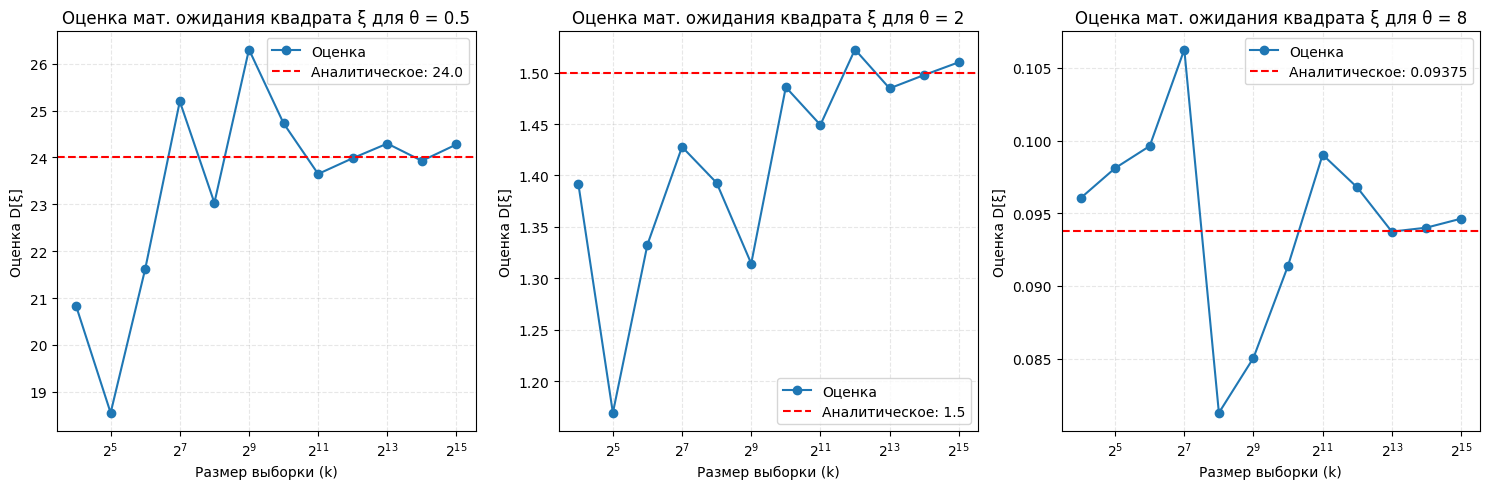

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, theta in enumerate(theta_values):
    ax = axes[i]
    
    k_vals = results[theta]['k']
    sqr_mean_est = results[theta]['sqr_mean_est']
    analytical_sqr_mean = analytical_results[theta]['mean x^2']
    
    ax.plot(k_vals, sqr_mean_est, 'o-', label='Оценка')
    ax.axhline(y=analytical_sqr_mean, color='r', linestyle='--', label=f'Аналитическое: {analytical_sqr_mean}')
    
    ax.set_xscale('log', base=2)
    ax.set_xlabel('Размер выборки (k)')
    ax.set_ylabel('Оценка D[ξ]')
    ax.set_title(f'Оценка мат. ожидания квадрата ξ для θ = {theta}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 2

Дана плотность распределения случайной величины $\xi$:
$$
f_{\xi}^{\lambda, a}(x) = 
\begin{cases} 
\lambda e^{-\lambda(x-a)}, & x \geq a \\ 
0, & \text{else}
\end{cases}
$$

$(\lambda, a) = (2, 2)$


(a) Аналитически вычислить значения моды, мат. ожидания и медианы

##### **Мода:**  
$
(f_{\xi}^{\lambda, a}(x))' = \begin{cases} 
-\lambda^2 e^{-\lambda(x-a)} <0, & x \geq a \\ 
0, & \text{else}
\end{cases}
$

При $x > a$ производная <0, значит, $f_{\xi}(x)$ убывает => при $x = 2$: $f_{\xi}(x)$ max  
Т.е. мода: $x = 2$

##### **Мат. ожидание:**  
$
\mathsf{E}[\xi] = \int\limits_{-\infty}^{\infty} x \cdot f(x) dx = \int\limits_{a}^{\infty} x \cdot \lambda e^{-\lambda(x-a)} dx = \int\limits_{2}^{\infty} x \cdot 2 e^{-2(x-2)} dx = \int\limits_{0}^{\infty} (t+2) \cdot 2 e^{-2t} dt= \int\limits_{0}^{\infty} t \cdot 2 e^{-2t} dt + \int\limits_{0}^{\infty} 4 e^{-2t} dt = -\int\limits_{0}^{\infty} t d(e^{-2t}) -2 \int\limits_{0}^{\infty} e^{-2t} d(-2t) = -te^{-2t}|_0^{\infty}+\int\limits_{0}^{\infty} e^{-2t} dt -2 \int\limits_{0}^{\infty} e^{-2t} d(-2t) = (-\frac{1}{2} - 2) \int\limits_{0}^{\infty} e^{-2t} d(-2t) = \frac{1}{2} + 2 = 2.5
$



##### **Медиана:**  
$
F_\xi(m) = P(\xi ≤ m) = 0.5
$  
$
F_\xi(x) = \int\limits_{-\infty}^x f_{\xi}(t) dt = \int\limits_a^x \lambda e^{-\lambda(t-a)} dt = 1-e^{-2(x-2)} 
$  
$  
F_\xi(m) = 1-e^{-2(m-2)} = 0.5, 
$  
$m = 2+\frac{ln2}{2} \approx 2.34657$

(b) Создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического ожидания и медианы.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns

lambd = 2
a = 2

large_size = 10000
small_size = 20

np.random.seed(42)
large_sample = a + np.random.exponential(scale=1/lambd, size=large_size)
small_sample = a + np.random.exponential(scale=1/lambd, size=small_size)

mode_l = mode(large_sample, keepdims=True)[0]
mode_s = mode(small_sample, keepdims=True)[0]

mean_l = np.mean(large_sample)
mean_s = np.mean(small_sample)

median_l = np.median(large_sample)
median_s = np.median(small_sample)

print("Мода:")
print("Аналитическое значение:", 2)
print("Большая выборка:", mode_l)
print("Маленькая выборка:", mode_s)
print('-------------')

print("Мат. ожидание:")
print("Аналитическое значение:", 2.5)
print("Большая выборка:", mean_l)
print("Маленькая выборка:", mean_s)
print('-------------')

print("Медиана:")
print("Аналитическое значение:", 2.34657)
print("Большая выборка:", median_l)
print("Маленькая выборка:", median_s)
print('-------------')


Мода:
Аналитическое значение: 2
Большая выборка: [2.00000582]
Маленькая выборка: [2.00349095]
-------------
Мат. ожидание:
Аналитическое значение: 2.5
Большая выборка: 2.4887494773451175
Маленькая выборка: 2.412490598545824
-------------
Медиана:
Аналитическое значение: 2.34657
Большая выборка: 2.3391574793230996
Маленькая выборка: 2.278821687664316
-------------


(c) Постройте для первой выборки на одном графике: гистограмму распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией распределения плотности и аналитическими значениями мод, математического ожидания и медианы.
То же самое, для второй.

In [31]:
# Функция распределения плотности
def pdf(x):
    return lambd * np.exp(-lambd * (x - a))

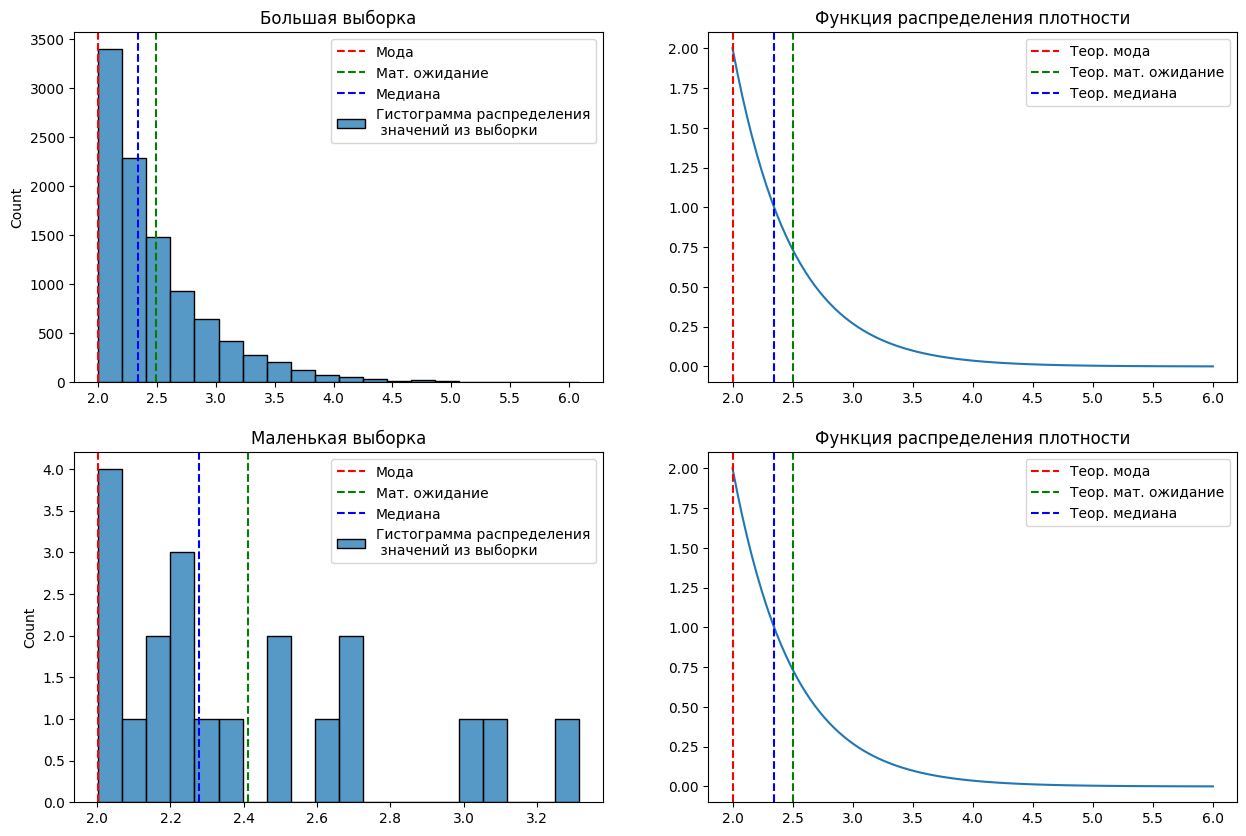

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

ax1 = axes[0][0]
sns.histplot(large_sample, ax = ax1, bins=20, label='Гистограмма распределения\n значений из выборки')
ax1.axvline(x=mode_l, color='r', linestyle='--', label=f'Мода')
ax1.axvline(x=mean_l, color='g', linestyle='--', label=f'Мат. ожидание')
ax1.axvline(x=median_l, color='b', linestyle='--', label=f'Медиана')
ax1.set_title("Большая выборка")
ax1.legend()

ax2 = axes[1][0]
sns.histplot(small_sample, ax = ax2, bins=20, label='Гистограмма распределения\n значений из выборки')
ax2.axvline(x=mode_s, color='r', linestyle='--', label=f'Мода')
ax2.axvline(x=mean_s, color='g', linestyle='--', label=f'Мат. ожидание')
ax2.axvline(x=median_s, color='b', linestyle='--', label=f'Медиана')
ax2.set_title("Маленькая выборка")
ax2.legend()

x = np.linspace(2, 6, 100)
ax3 = axes[0][1]
ax3.plot(x, pdf(x))
ax3.axvline(x=2, color='r', linestyle='--', label=f'Теор. мода')
ax3.axvline(x=2.5, color='g', linestyle='--', label=f'Теор. мат. ожидание')
ax3.axvline(x=2.34657, color='b', linestyle='--', label=f'Теор. медиана')
ax3.set_title("Функция распределения плотности")
ax3.legend()

x = np.linspace(2, 6, 100)
ax4 = axes[1][1]
ax4.plot(x, pdf(x))
ax4.axvline(x=2, color='r', linestyle='--', label=f'Теор. мода')
ax4.axvline(x=2.5, color='g', linestyle='--', label=f'Теор. мат. ожидание')
ax4.axvline(x=2.34657, color='b', linestyle='--', label=f'Теор. медиана')
ax4.set_title("Функция распределения плотности")
ax4.legend()

(d) Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или нет.

Медиана 2.534405254249136 Мат. ожидание: 2.6135735098002955
-------------
Медиана 2.352395416215529 Мат. ожидание: 2.5088503302534546
-------------
Медиана 2.347710422062976 Мат. ожидание: 2.4980316350165017
-------------
Медиана 2.347734460303816 Мат. ожидание: 2.4993784533282137
-------------
Медиана 2.3479563227738596 Мат. ожидание: 2.4963876337924917
-------------
Медиана 2.3480338420251092 Мат. ожидание: 2.503874253749974
-------------
Медиана 2.34786608737949 Мат. ожидание: 2.50076030678365
-------------
Медиана 2.3480716236368213 Мат. ожидание: 2.5030876140515566
-------------
Медиана 2.344432279306203 Мат. ожидание: 2.498039511381307
-------------
Медиана 2.347451005961554 Мат. ожидание: 2.498668157659916
-------------
Медиана 2.3477102695886445 Мат. ожидание: 2.5009471388902464
-------------
Медиана 2.344230836568161 Мат. ожидание: 2.5001849086053727
-------------
Медиана 2.3472013722362215 Мат. ожидание: 2.5008829690847327
-------------
Медиана 2.350083170205205 Мат. ожидание

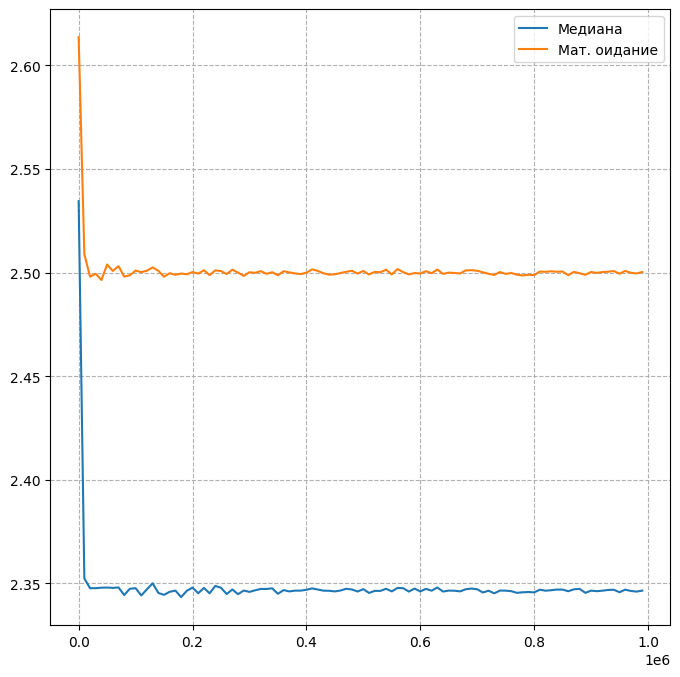

In [33]:
from scipy.stats import mode
sizes = []
medians = []
means = []

for size in range(20, 1000000, 10000):
    sample = a + np.random.exponential(scale=1/lambd, size=size)

    mode_ = mode(sample, keepdims=True)[0]
    mean = np.mean(sample)
    median = np.median(sample)

    print("Медиана", median, "Мат. ожидание:", mean)
    print('-------------')

    sizes.append(size)
    medians.append(median)
    means.append(mean)

plt.figure(figsize=(8, 8))
plt.plot(sizes, medians, label='Медиана')
plt.plot(sizes, means, label='Мат. оидание')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## 1.2 Моделирование совместного распределения двух СВ

Пусть совместное распределение двух случайных величин задано таблицей

$$
\begin{array}{  c | c | c | c | c  }
\xi\backslash \eta & 1 & 2 & 3 & \ldots \\ \hline
-1 & \frac{2}{5}\cdot \frac{1}{2^1} &\frac{2}{5}\cdot \frac{1}{2^2}& \frac{2}{5}\cdot \frac{1}{2^3}&  \ldots\\ \hline
0 & \frac{1}{5}\cdot \frac{1}{2^1} &\frac{1}{5}\cdot \frac{1}{2^2}& \frac{1}{5}\cdot \frac{1}{2^3}&  \ldots\\ \hline
1 & \frac{2}{5}\cdot \frac{1}{2^1} &\frac{2}{5}\cdot \frac{1}{2^2}& \frac{2}{5}\cdot \frac{1}{2^3}&  \ldots\\
\end{array}
$$

где $η$ принимает все значения из $N$. Вычислить корреляционую матрицу аналитически и приближенно (на основе моделирования).

#### Аналитическое решение

Находим маргинальные распределения для $\xi$ и $\eta$.   
1) для $\xi$:  
$P(\xi = -1) = \sum\limits_{i=1}^{\infty} P(\xi = -1, \eta = \eta_{i}) = \frac{2}{5} \cdot \sum\limits_{i=1}^{\infty} \frac{1}{2^k} = 
\frac{2}{5} \cdot \frac{\frac{1}{2}}{1 - \frac{1}{2}} = \frac{2}{5}$  
$P(\xi = 0) = \sum\limits_{i=1}^{\infty} P(\xi = -1, \eta = \eta_{i}) = \frac{1}{5} \cdot \sum\limits_{i=1}^{\infty} \frac{1}{2^k} = 
\frac{1}{5} \cdot \frac{\frac{1}{2}}{1 - \frac{1}{2}} = \frac{1}{5}$   
$P(\xi = 1) = \sum\limits_{i=1}^{\infty} P(\xi = -1, \eta = \eta_{i}) = \frac{2}{5} \cdot \sum\limits_{i=1}^{\infty} \frac{1}{2^k} = 
\frac{2}{5} \cdot \frac{\frac{1}{2}}{1 - \frac{1}{2}} = \frac{2}{5}$

2) для $\eta$:  
$P(\eta = k) = \sum\limits_{i=1}^{\infty} P(\xi = \xi_i, \eta = k) = \frac{1}{2^k} \cdot 1 = \frac{1}{2^k} $

Рассчитываем мат. ожидание и дисперсию

1) для $\xi$:  
$
\mathsf{E}[\xi] = \sum\limits_{x=-1}^{1} x \cdot P(\xi = x) = -\frac{2}{5} + 0 + \frac{2}{5} = 0
$  
$
\mathsf{E}[\xi^2] = \sum\limits_{x=-1}^{1} x^2 \cdot P(\xi = x) = \frac{2}{5} + 0 + \frac{2}{5} = \frac{4}{5}
$  
$
\mathsf{D}[\xi] = \mathsf{E}[\xi^2] - (\mathsf{E}[\xi])^2 = \frac{4}{5}
$
2) для $\eta$:  
$
\mathsf{E}[\eta] = \sum\limits_{x=1}^{\infty} x \cdot P(\eta = x) = \sum\limits_{x=1}^{\infty} \frac{x}{2^x} = 2
$  
***
$S = \sum\limits_{x=1}^{\infty} \frac{x}{2^x}$  
$\frac{S}{2} = \sum\limits_{x=1}^{\infty} \frac{x}{2^{x+1}} = S-\frac{S}{2} = (\frac{1}{2} + \frac{2}{4} + \frac{3}{8} + ...) - (\frac{1}{4} + \frac{2}{8} + \frac{3}{16} + ...) = \sum\limits_{x=1}^{\infty} \frac{1}{2^x} = 1$
***
$
\quad \quad \quad \mathsf{E}[\eta^2] = \sum\limits_{x=1}^{\infty} x^2 (\frac{1}{2})^x = 6
$  
***
$\sum\limits_{x=1}^{\infty} x^2 a^x = \frac{a(1+a)}{(1-a)^3}$ при $|a|<1$
***  
$
\quad \quad \quad \mathsf{D}[\eta] = \mathsf{E}[\eta^2] - (\mathsf{E}[\eta])^2 = 6-4 = 2
$

Ковариация:  
$\mathsf{E}(\xi,\eta) = \mathsf{E}(\xi) \cdot \mathsf{E}(\eta) = 0$, т.к. случайные величины независимы: $\quad \mathsf{P}(\xi=x,\eta=y)=\mathsf{P}(\xi=x)\mathsf{P}(\eta=y), \quad x=\{-1,0,1\}, y=\{1,2,3...\} $   

$\mathsf{cov}(\xi,\eta) = \mathsf{E}(\xi,\eta) − \mathsf{E}(\xi) \mathsf{E}(\eta) = 0 − 0 \cdot 2 = 0$   


$\rho(\xi,\eta) = \frac{\mathsf{cov}(\xi, \eta)}{\sqrt{\mathsf{D}\xi}\cdot\sqrt{\mathsf{D}\eta}} = 0$

Корреляционная матрица:

$$
\begin{pmatrix}
1 & \rho(\xi,\eta)\\
\rho(\xi,\eta) & 1
\end{pmatrix}=\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}.
$$

#### Приближенное решение

In [34]:
from scipy import stats

size = 100000 
np.random.seed(42)

eta_sample = stats.geom.rvs(p=0.5, size=size) # через геометрическое распределение scipy

values = [-1, 0, 1]
ps = [2/5, 1/5, 2/5]
xi_sample = np.random.choice(values, size=size, p=ps)

cov_matrix = np.cov(xi_sample, eta_sample, ddof=1)
corr_coef = np.corrcoef(xi_sample, eta_sample)

print(corr_coef)

[[1.         0.00226701]
 [0.00226701 1.        ]]
